In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = (250)

sns.set_style(style='darkgrid')
plt.tight_layout()

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

<Figure size 2500x1250 with 0 Axes>

In [5]:
df = pd.read_csv(r"C:\Users\sandi\Documents\GitHub\Assignments\Assignment_09_Association Rules\Dataset\book.csv")

In [6]:
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [7]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [9]:
df.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

Text(0.5, 1.0, 'Most Frequent Books')

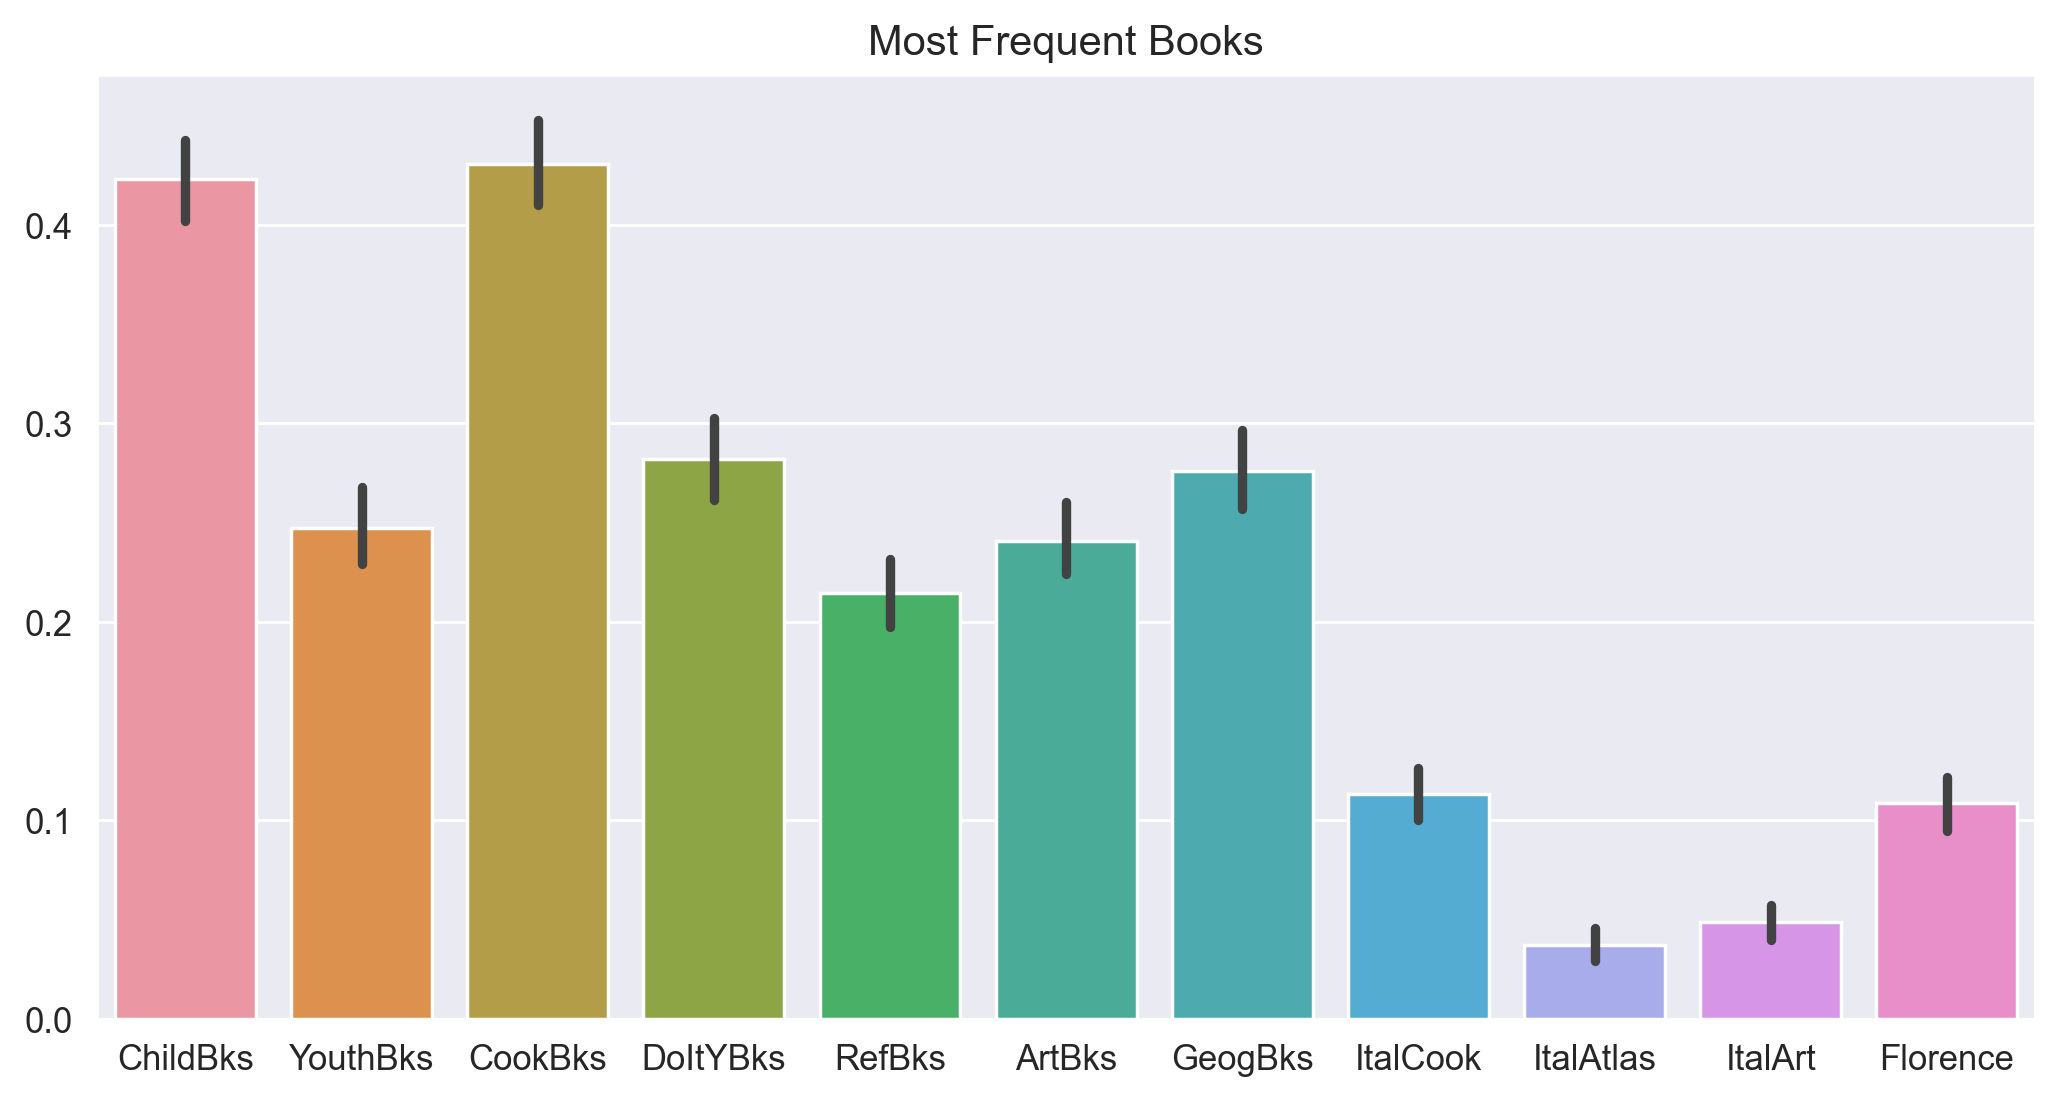

In [13]:
sns.barplot(data=df)
plt.title('Most Frequent Books')

# Confidence of 0.20

In [20]:
ap_20 = apriori(df,min_support=0.2,use_colnames=True)
ap_20

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [24]:
model_20 = association_rules(ap_20,metric='lift')
model_20

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [27]:
model_20_vis=pd.DataFrame({
                            'support':model_20['support'],
                            'confidence':model_20['confidence'],
                            'lift': round(model_20['lift'])
                                                  })
model_20_vis

,support,confidence,lift
0,0.256,0.593968,1.0
1,0.256,0.605201,1.0


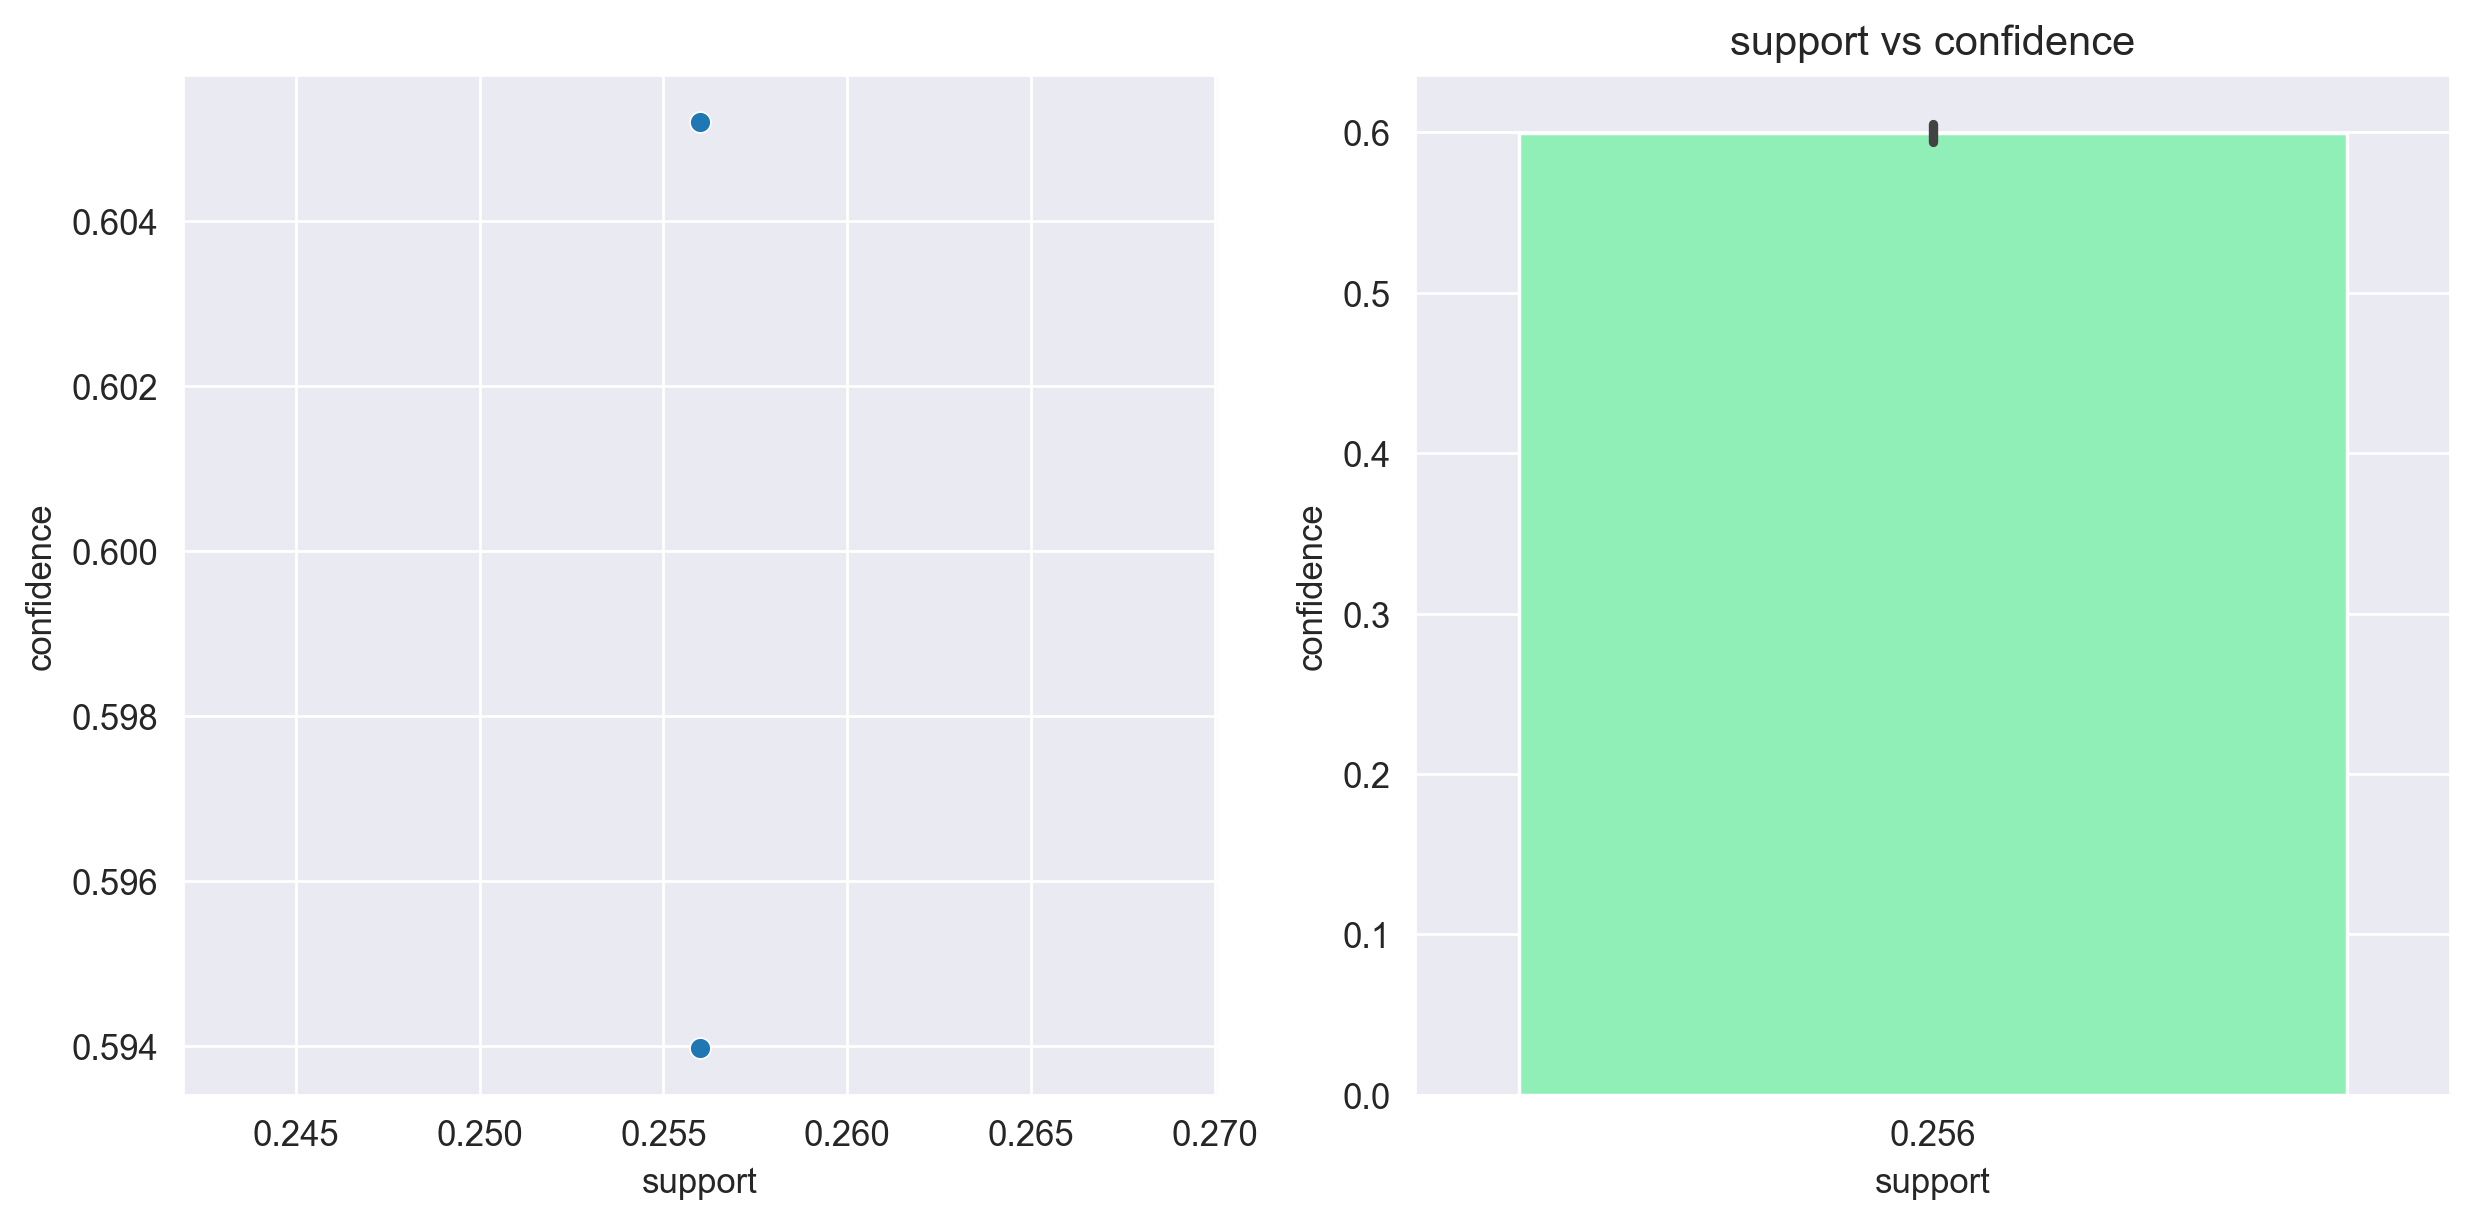

In [28]:
fig, ax = plt.subplots(ncols=2)

sns.scatterplot(model_20_vis['support'],model_20_vis['confidence'], palette='rainbow', ax= ax[0])
plt.title('support vs confidence')
sns.barplot(model_20_vis['support'],model_20_vis['confidence'], palette='rainbow', ax= ax[1])

plt.tight_layout()

<!-- confidence of 0.15 -->

# confidence of 0.15

In [29]:
ap_15= apriori(df,min_support=0.15,use_colnames=True)
ap_15

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [30]:
model_15 = association_rules(ap_15,metric='lift')
model_15

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [32]:
model_15_vis=pd.DataFrame({
                            'support':model_15['support'],
                            'confidence':model_15['confidence'],
                            'lift': round(model_15['lift'])
                                                  })
model_15_vis

,support,confidence,lift
0,0.1650,0.666667,2.0
1,0.1650,0.390071,2.0
2,0.2560,0.593968,1.0
3,0.2560,0.605201,1.0
4,0.1840,0.434988,2.0
5,0.1840,0.652482,2.0
6,0.1515,0.706294,2.0
7,0.1515,0.358156,2.0
8,0.1625,0.674274,2.0
9,0.1625,0.384161,2.0


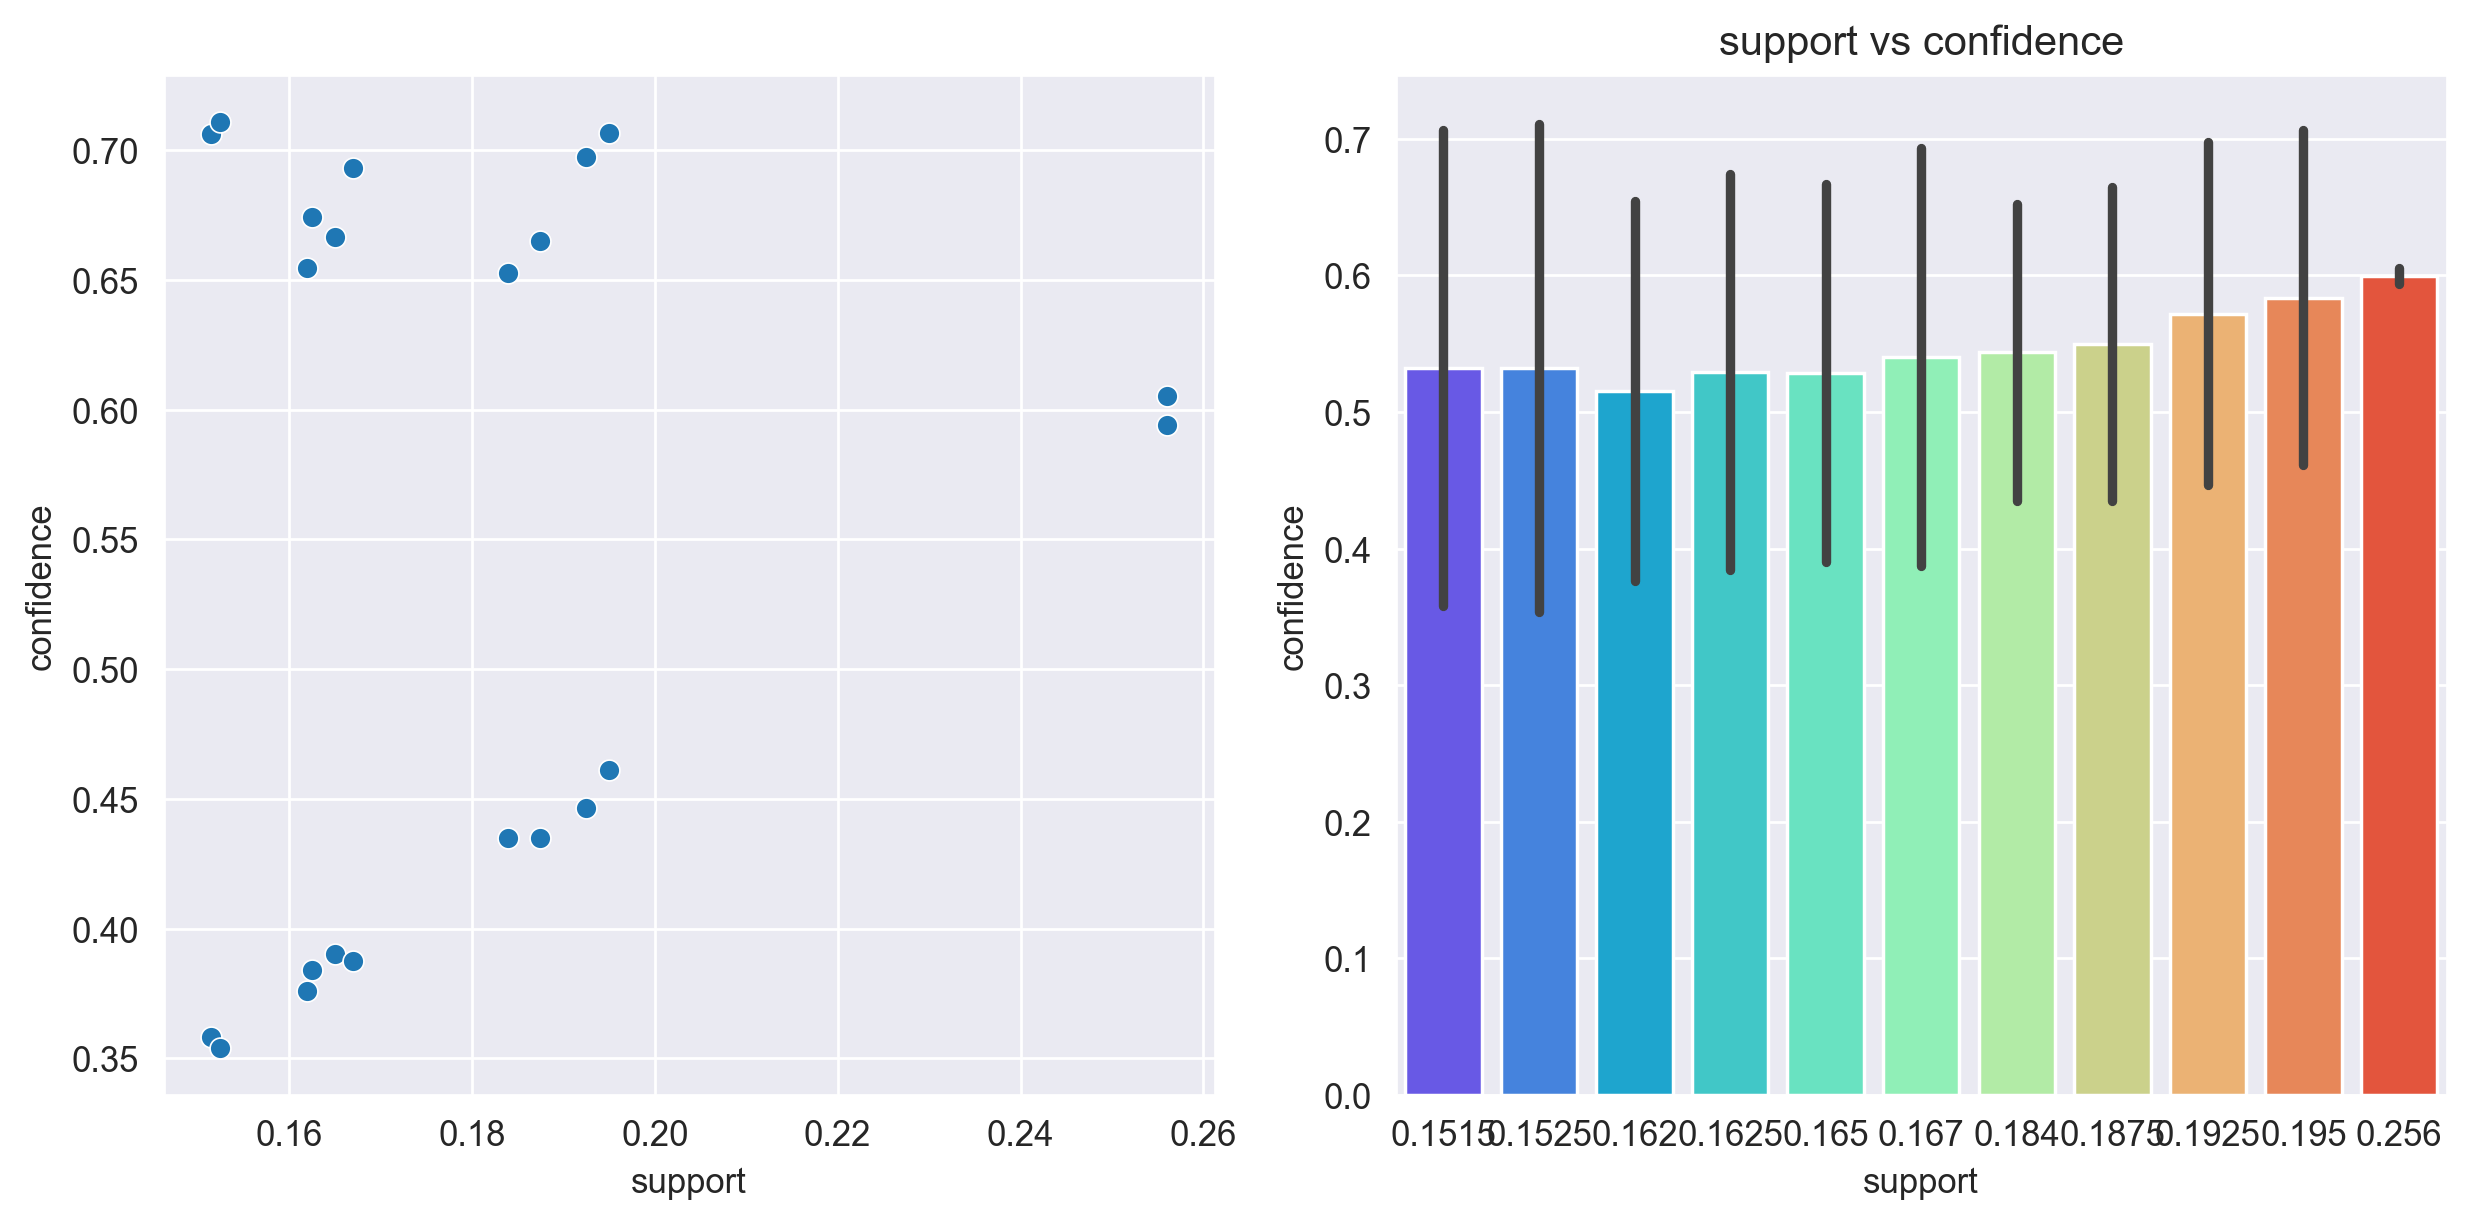

In [33]:
fig, ax = plt.subplots(ncols=2)

sns.scatterplot(model_15_vis['support'],model_15_vis['confidence'], palette='rainbow', ax= ax[0])
plt.title('support vs confidence')
sns.barplot(model_15_vis['support'],model_15_vis['confidence'], palette='rainbow', ax= ax[1])

plt.tight_layout()

# confidence of 10% 

In [34]:
ap_10= apriori(df,min_support=0.15,use_colnames=True)
ap_10

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [35]:
model_10 = association_rules(ap_10,metric='lift')
model_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [36]:
model_10_vis=pd.DataFrame({
                            'support':model_10['support'],
                            'confidence':model_10['confidence'],
                            'lift': round(model_10['lift'])
                                                  })
model_10_vis

,support,confidence,lift
0,0.1650,0.666667,2.0
1,0.1650,0.390071,2.0
2,0.2560,0.593968,1.0
3,0.2560,0.605201,1.0
4,0.1840,0.434988,2.0
5,0.1840,0.652482,2.0
6,0.1515,0.706294,2.0
7,0.1515,0.358156,2.0
8,0.1625,0.674274,2.0
9,0.1625,0.384161,2.0


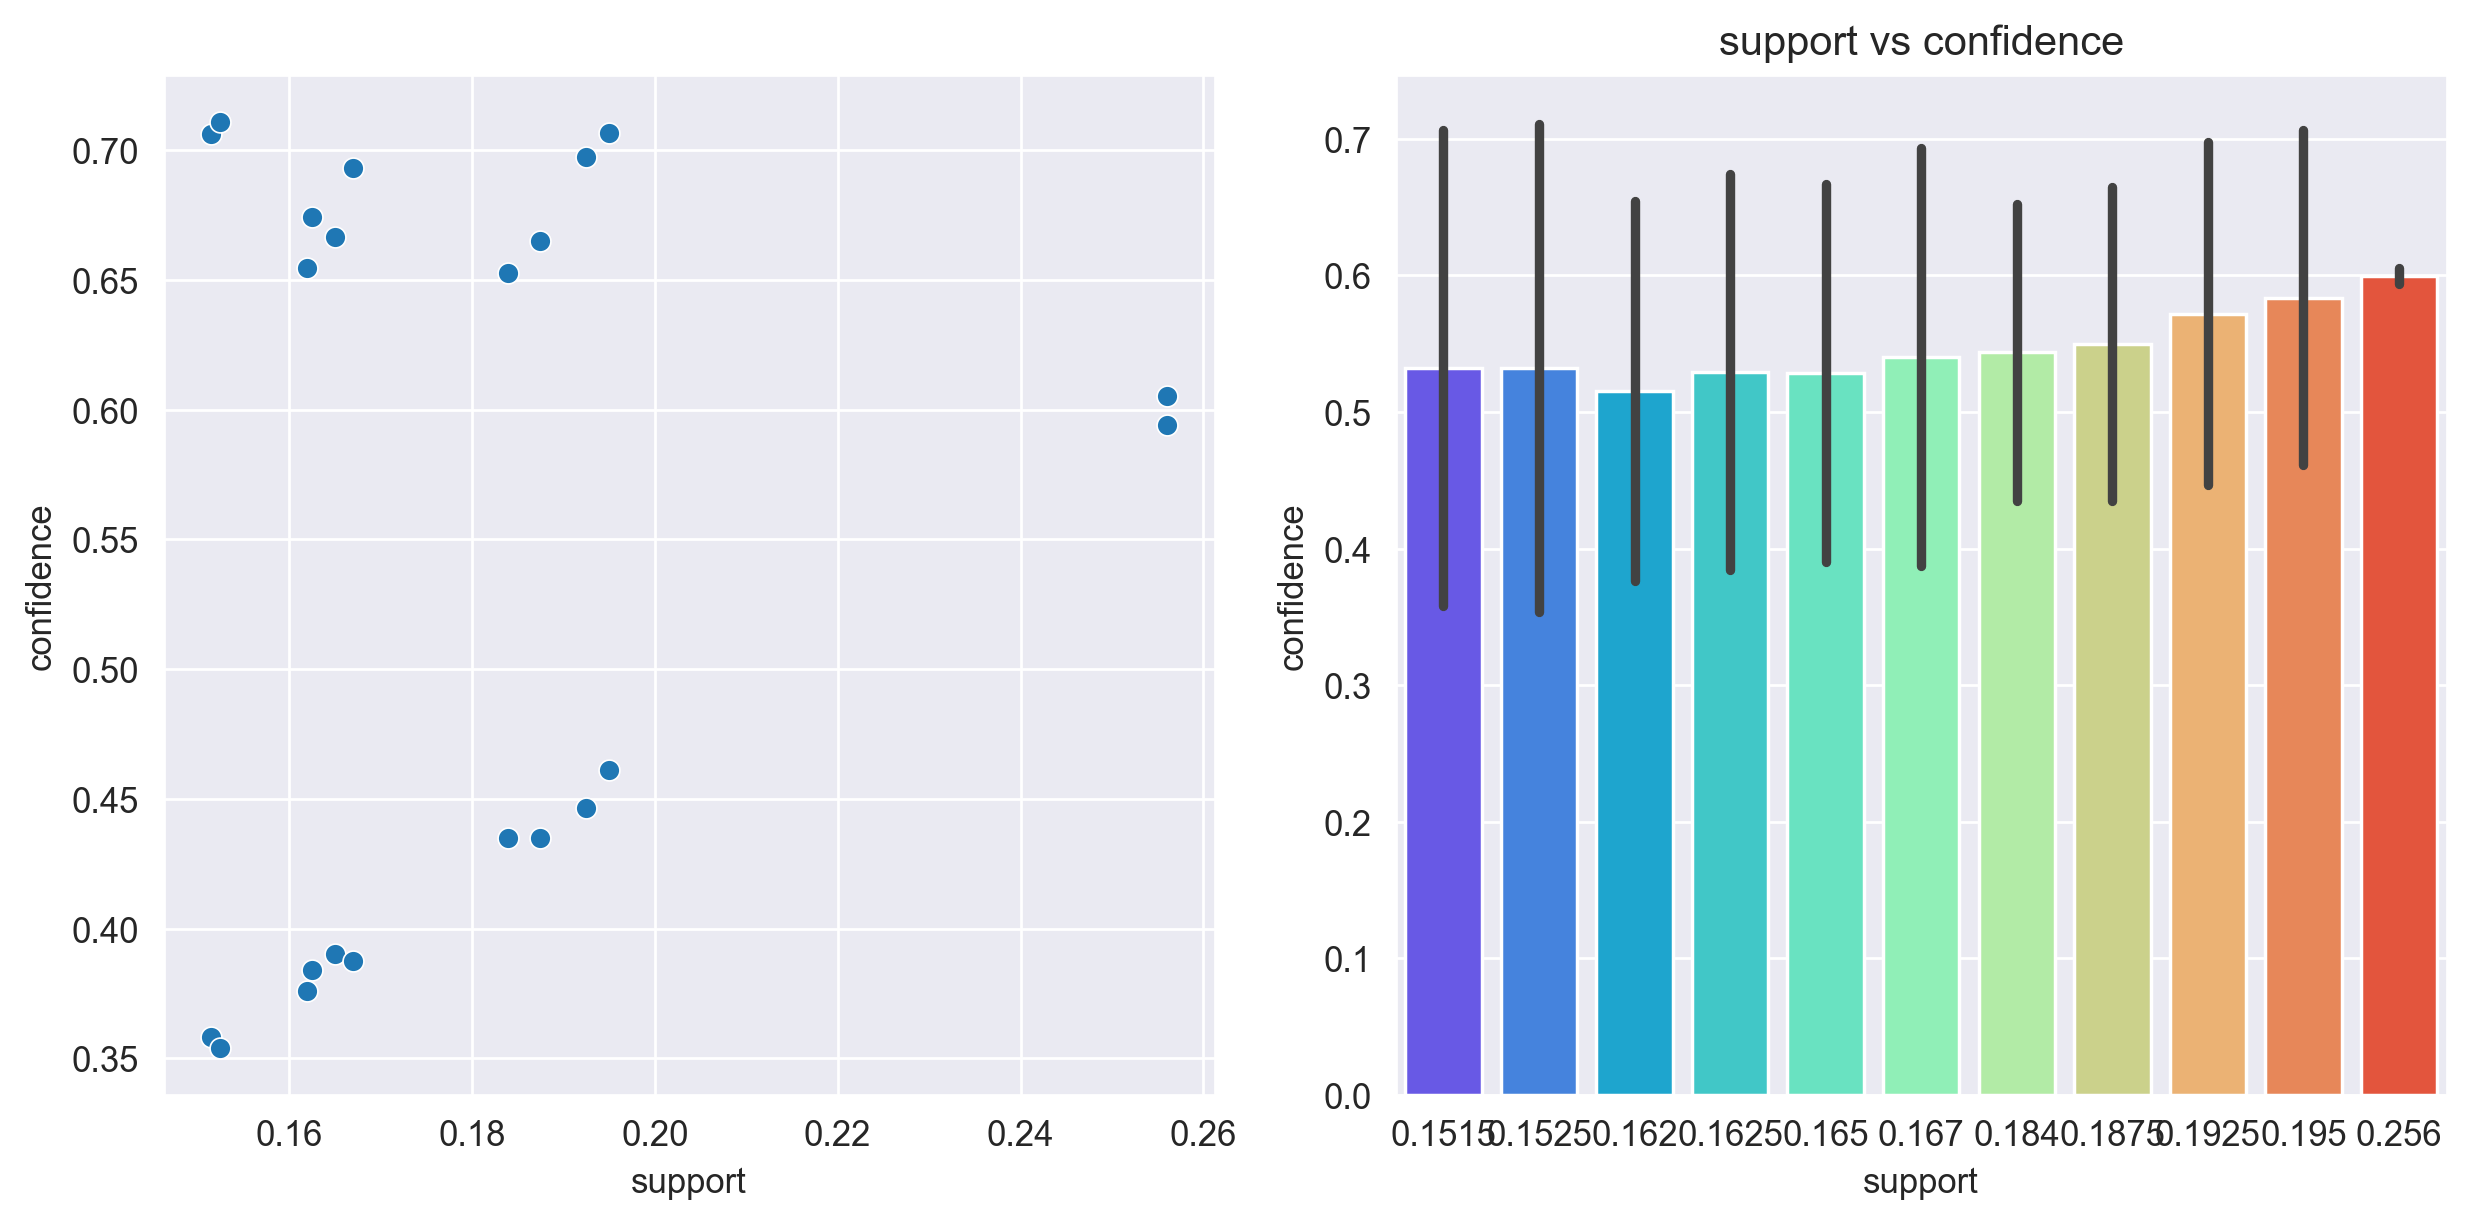

In [37]:
fig, ax = plt.subplots(ncols=2)

sns.scatterplot(model_10_vis['support'],model_10_vis['confidence'], palette='rainbow', ax= ax[0])
plt.title('support vs confidence')
sns.barplot(model_10_vis['support'],model_10_vis['confidence'], palette='rainbow', ax= ax[1])

plt.tight_layout()